In [124]:
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
import numpy as np 
import pandas as pd 

import os
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# data = pd.read_csv('BostonHousing.csv', header=None, delimiter=r"\s+", names=column_names)
data_original = pd.read_csv('BostonHousing.csv')
data_original.head(5)

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [126]:
print(np.shape(data_original))

(506, 14)


In [127]:
data_original.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [128]:
data_original = data_original.dropna()

In [129]:
print(data_original.describe().transpose())

            count        mean         std        min        25%        50%  \
Crime_rate  501.0    3.647414    8.637688    0.00632    0.08199    0.26169   
zn          501.0   11.402196   23.414214    0.00000    0.00000    0.00000   
indus       501.0   11.160619    6.857123    0.46000    5.19000    9.69000   
chas        501.0    0.069860    0.255166    0.00000    0.00000    0.00000   
nox         501.0    0.555151    0.116186    0.38500    0.44900    0.53800   
rm          501.0    6.284341    0.705587    3.56100    5.88400    6.20800   
Age         501.0   68.513373   28.212221    2.90000   45.00000   77.70000   
Distance    501.0    3.786423    2.103327    1.12960    2.08820    3.18270   
rad         501.0    9.596806    8.735509    1.00000    4.00000    5.00000   
tax         501.0  409.143713  169.021216  187.00000  279.00000  330.00000   
ptratio     501.0   18.453493    2.166327   12.60000   17.40000   19.00000   
b           501.0  356.298523   91.672055    0.32000  375.21000 

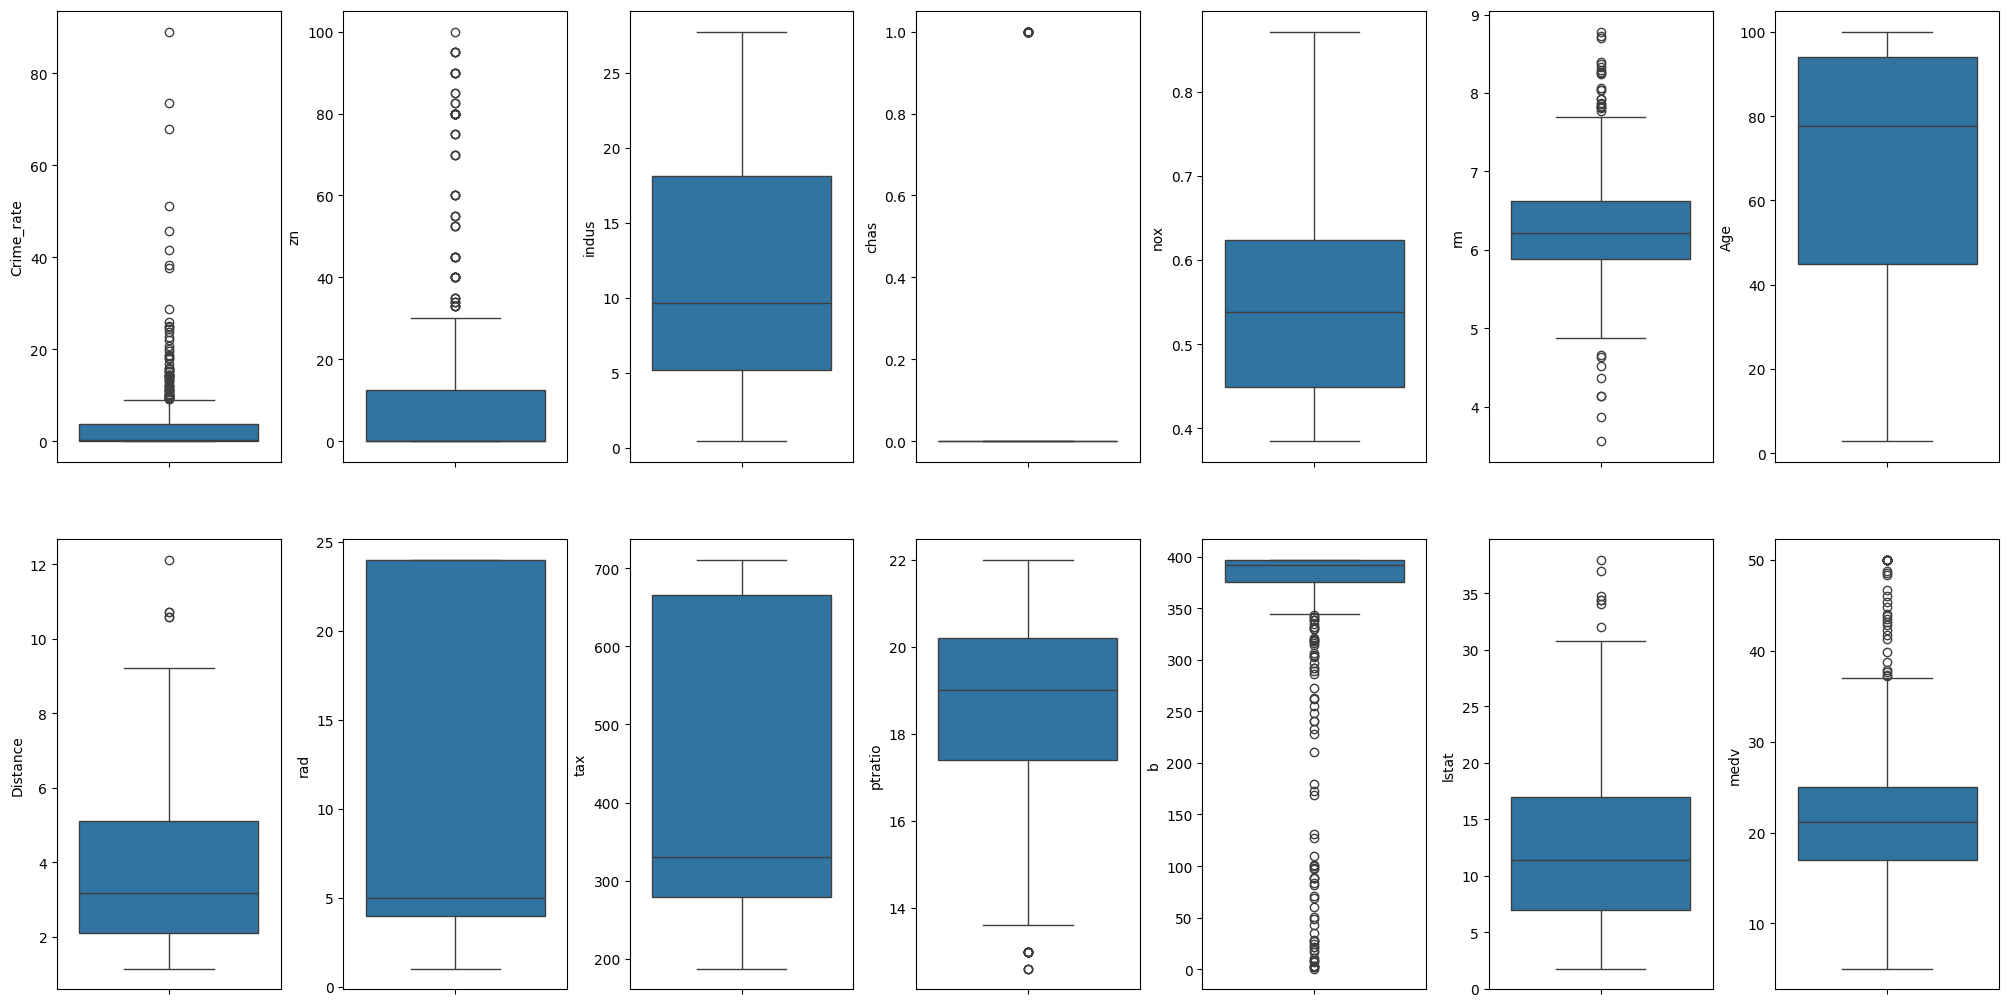

In [130]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col,value in data_original.items():
    sns.boxplot(y=col, data=data_original, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [131]:
for k, v in data_original.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data_original)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Crime_rate outliers = 13.17%
Column zn outliers = 13.57%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.99%
Column Age outliers = 0.00%
Column Distance outliers = 1.00%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.99%
Column b outliers = 15.17%
Column lstat outliers = 1.40%
Column medv outliers = 7.98%


In [132]:
data_original = data_original[~(data_original['medv'] >= 50.0)]
data_original = data_original[~(data_original['Crime_rate'] >= 88.97)]
data_original = data_original[~(data_original['zn'] >= 100.0)]
data_original = data_original[~(data_original['b'] >= 396.9)]
print(np.shape(data_original))

(364, 14)


In [133]:
numeric_cols = data_original.select_dtypes(include=['float64', 'int64'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

IQR = Q3 - Q1

In [134]:
low = Q1 - 1.5 * IQR
high = Q3+1.5*IQR
print(low,high)

Crime_rate     -5.301364
zn            -18.750000
indus         -14.175000
chas            0.000000
nox             0.196500
rm              4.821625
Age           -24.100000
Distance       -2.294925
rad           -26.000000
tax          -281.500000
ptratio        12.200000
b             301.563750
lstat          -6.822500
medv            4.662500
dtype: float64 Crime_rate       9.071926
zn              31.250000
indus           37.465000
chas             0.000000
nox              0.880500
rm               7.662625
Age            164.100000
Distance         9.441075
rad             54.000000
tax           1234.500000
ptratio         25.000000
b              448.233750
lstat           31.457500
medv            36.762500
dtype: float64


In [135]:
numeric_cols = data_original.select_dtypes(include=['float64', 'int64'])

for i in numeric_cols:
    data = data_original.drop(data_original[(data[i] > high[i]) & (data_original[i] < low[i])].index) 
print(np.shape(data))

(364, 14)


In [136]:
from sklearn.preprocessing import MinMaxScaler

def replace_outliers_with_normalized(df, columns, factor=1.5):

    df_processed = df.copy()
    
    for col in columns:
        # Compute the first and third quartiles and the IQR
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Replace outliers with the boundary values
        df_processed[col] = df_processed[col].apply(
            lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
        )
        
        # Normalize the column using min-max normalization
        scaler = MinMaxScaler()
        df_processed[[col]] = scaler.fit_transform(df_processed[[col]])
        
    return df_processed

# Example usage:
# Assume df is your DataFrame containing the Boston Housing dataset.
# Get the list of numeric columns (for example, you can customize this list)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Replace outliers and normalize the numeric columns
df_processed = replace_outliers_with_normalized(data, numeric_columns)

# Display the first few rows to see the effect
print(df_processed.head())


   Crime_rate   zn     indus  chas       nox        rm       Age  Distance  \
2    0.002012  0.0  0.220588   0.0  0.172840  0.831881  0.599382  0.458552   
3    0.002572  0.0  0.036199   0.0  0.150206  0.766059  0.441813  0.591083   
5    0.002294  0.0  0.036199   0.0  0.150206  0.566130  0.574665  0.591083   
6    0.008742  0.4  0.250754   0.0  0.286008  0.418999  0.656025  0.530366   
8    0.022309  0.4  0.250754   0.0  0.286008  0.284891  1.000000  0.593491   

        rad       tax   ptratio         b     lstat      medv  
2  0.043478  0.104962  0.553191  0.962153  0.069545  0.935065  
3  0.086957  0.066794  0.648936  0.981129  0.032567  0.894136  
5  0.086957  0.066794  0.648936  0.975753  0.109575  0.746163  
6  0.173913  0.236641  0.276596  0.991355  0.354508  0.563558  
8  0.173913  0.236641  0.276596  0.896791  0.948181  0.362062  


In [137]:
for k, v in df_processed.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Crime_rate outliers = 12.36%
Column zn outliers = 12.36%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 0.00%
Column Age outliers = 0.00%
Column Distance outliers = 0.00%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 0.00%
Column b outliers = 14.84%
Column lstat outliers = 0.00%
Column medv outliers = 4.95%


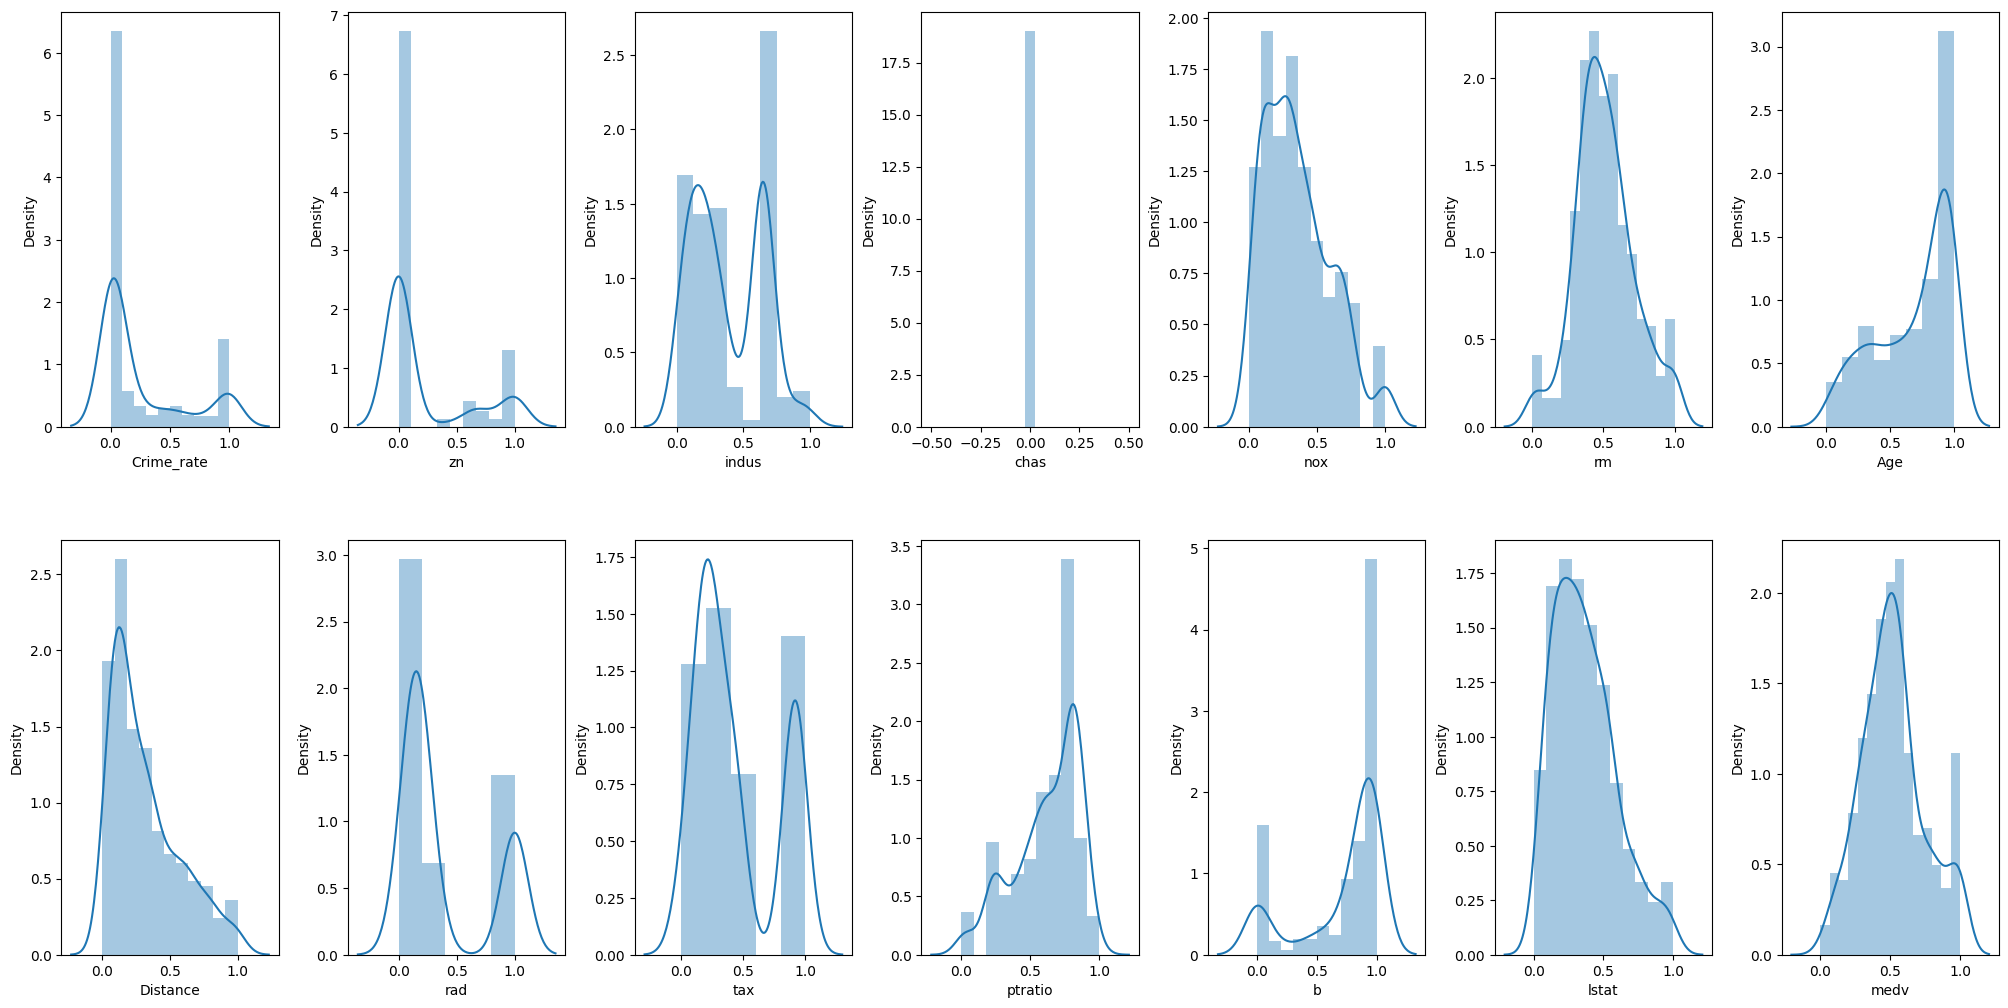

In [138]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_processed.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

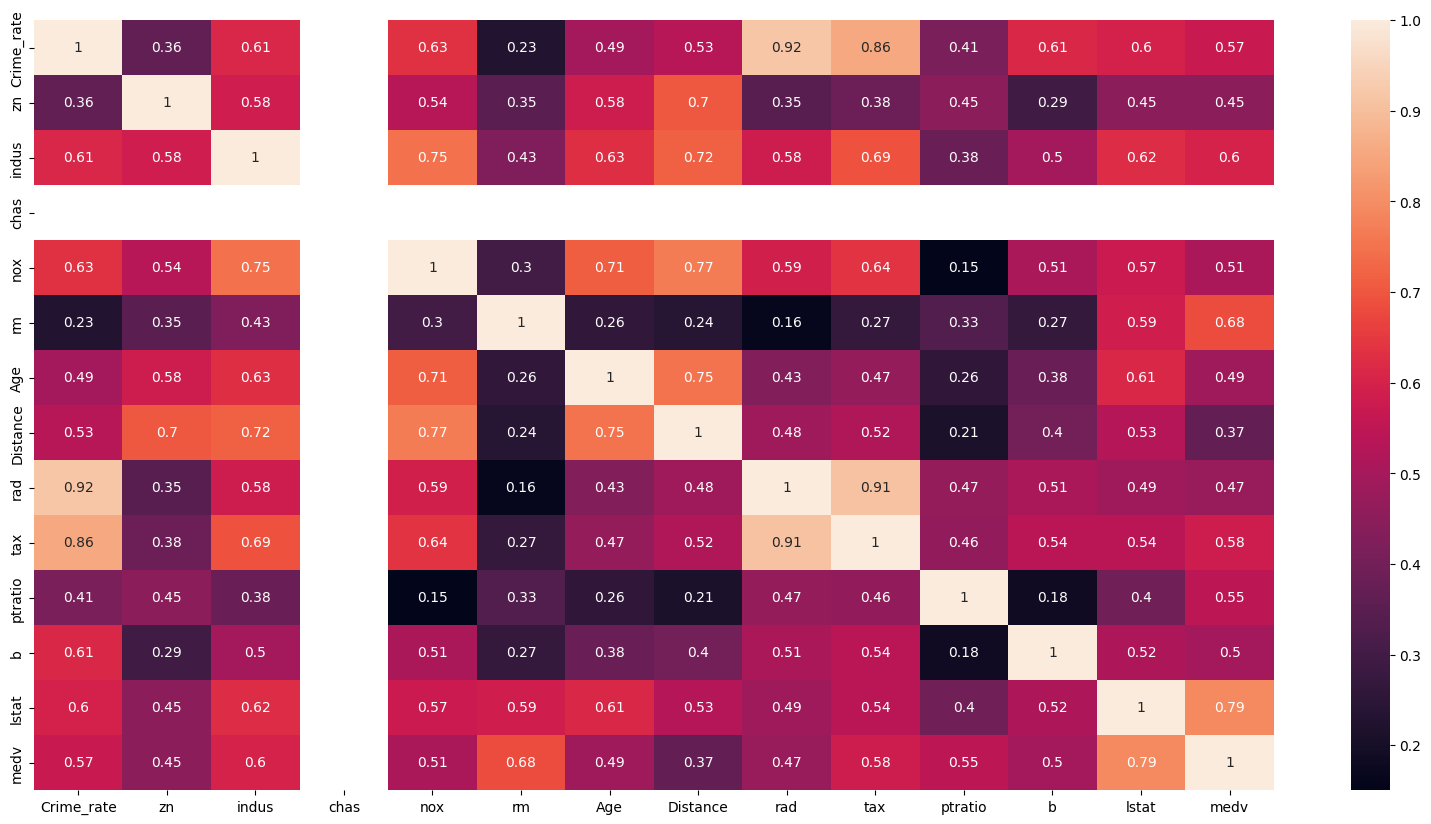

In [139]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_processed.corr().abs(),  annot=True)
plt.show()

In [140]:
X = df_processed.drop(columns=['medv'])
y = df_processed['medv']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
lr = LinearRegression()

In [143]:
lr.fit(X_train, y_train)

LinearRegression()

In [144]:
y_pred = lr.predict(X_test)

In [145]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [148]:
print("Model Performance:")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))

Model Performance:
Mean Squared Error (MSE): 0.01
R-squared (R2 ): 0.83


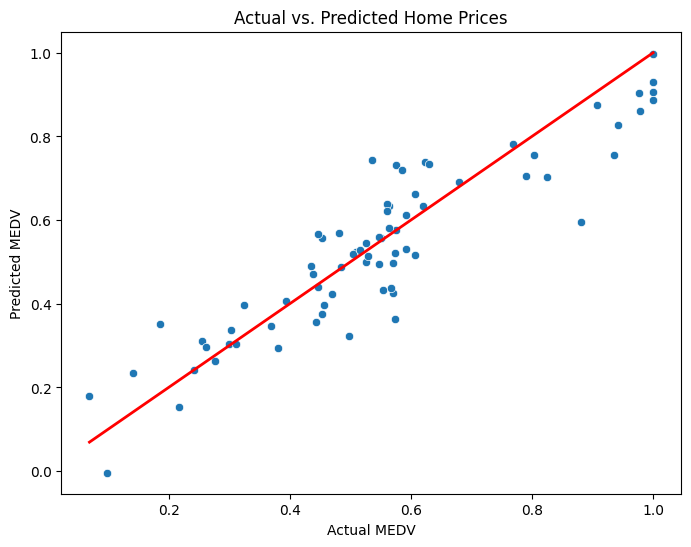

In [147]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted Home Prices")
plt.show()